In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('data/clip_labels.csv')

In [16]:
initial_columns_to_check = ['Unsure', 'PoorAudioQuality', 'Prolongation', 'Block', 'SoundRep', 'WordRep', 
                    'DifficultToUnderstand', 'Interjection', 'NoStutteredWords', 'NaturalPause', 
                    'Music', 'NoSpeech']

# Continuing from your previous filtering
filtered_data = df[~df[initial_columns_to_check].isin([1, 2]).any(axis=1)]

# remove all rows where the value in the music column is 3
filtered_data = filtered_data[filtered_data['Music'] != 3]

# create a new column called Rep. the value in this column will be a sort of "OR" operation on the values in the SoundRep and WordRep columns. it is 3 if either of the columns is 3, and 0 otherwise
filtered_data['Rep'] = filtered_data['SoundRep'] | filtered_data['WordRep']

# remove soundrep and wordrep columns
filtered_data.drop(['SoundRep', 'WordRep'], axis=1, inplace=True)

final_columns_to_check = ['Unsure', 'PoorAudioQuality', 'Prolongation', 'Block', 'Rep', 
                    'DifficultToUnderstand', 'Interjection', 'NoStutteredWords', 'NaturalPause', 
                    'Music', 'NoSpeech']

# Summing up the values in the specified columns for each row
filtered_data['sum_columns'] = filtered_data[final_columns_to_check].sum(axis=1)

In [17]:
# create a new column called y
# go through each row. if the sum_column value for that row is 3, the cell in the y column for that row is the name of the column that has a value of 3
# if the sum_column value for that row is 6, it is kinda complicated. i need you to follow the rules i made:
# if the pair is ('Interjection', 'NoStutteredWords'), then the y value is Interjection
# if the pair is ('Rep', 'Interjection'), then the y value is Rep
# if the pair is ('NoStutteredWords', 'NaturalPause'), then the y value is NaturalPause
# if the pair is ('Prolongation', 'Interjection'), then the y value is Prolongation
# if the pair is ('NoStutteredWords', 'NoSpeech'), then the y value is NoSpeech
# if the pair is ('Prolongation', 'Rep'), then the y value is Unsure
# if the pair is ('DifficultToUnderstand', 'NoStutteredWords'), then the y value is Unsure
# if the pair is ('Block', 'Interjection'), then the y value is Unsure
# if the pair is ('Prolongation', 'NaturalPause'), then the y value is Unsure
# if the pair is ('Block', 'Rep'), then the y value is Unsure
# if the pair is ('PoorAudioQuality', 'NoStutteredWords), then the y value is Unsure
# if the pair is ('Rep', 'DifficultToUnderstand'), then the y value is Unsure
# if the pair is ('Block', 'DifficultToUnderstand'), then the y value is Unsure
# if the pair is ('PoorAudioQuality', 'Prolongation'), then the y value is Unsure
# if the pair is ('Prolongation', 'DifficultToUnderstand), then the y value is Unsure
# if the pair is ('Rep', 'NaturalPause'), then the y value is Unsure
# if the pair is ('Prolongation', 'Block'), then the y value is Unsure
# if the sum_column value for that row is 9, then the cell in the y column for that row is 'Interjection'


In [18]:
# Defining rules for complex logic in y column
def define_y(row):
    if row['sum_columns'] == 3:
        for col in final_columns_to_check:
            if row[col] == 3:
                return col
    elif row['sum_columns'] == 6:
        pairs = {
            ('Interjection', 'NoStutteredWords'): 'Interjection',
            ('Rep', 'Interjection'): 'Rep',
            ('NoStutteredWords', 'NaturalPause'): 'NaturalPause',
            ('Prolongation', 'Interjection'): 'Prolongation',
            ('NoStutteredWords', 'NoSpeech'): 'NoSpeech',
            ('Prolongation', 'Rep'): 'Unsure',
            ('DifficultToUnderstand', 'NoStutteredWords'): 'Unsure',
            ('Block', 'Interjection'): 'Unsure',
            ('Prolongation', 'NaturalPause'): 'Unsure',
            ('Block', 'Rep'): 'Unsure',
            ('PoorAudioQuality', 'NoStutteredWords'): 'Unsure',
            ('Rep', 'DifficultToUnderstand'): 'Unsure',
            ('Block', 'DifficultToUnderstand'): 'Unsure',
            ('PoorAudioQuality', 'Prolongation'): 'Unsure',
            ('Prolongation', 'DifficultToUnderstand'): 'Unsure',
            ('Rep', 'NaturalPause'): 'Unsure',
            ('Prolongation', 'Block'): 'Unsure'
        }
        for key, value in pairs.items():
            if row[key[0]] == 3 and row[key[1]] == 3:
                return value
    elif row['sum_columns'] == 9:
        return 'Interjection'
    return 'Unsure'  # Default case if no other condition is met

# Apply function to create new column 'y'
filtered_data['y'] = filtered_data.apply(define_y, axis=1)


In [19]:
# replace all the values in the y column that are 'NaturalPause' with 'NoSpeech'
filtered_data['y'] = filtered_data['y'].replace('NaturalPause', 'NoSpeech')

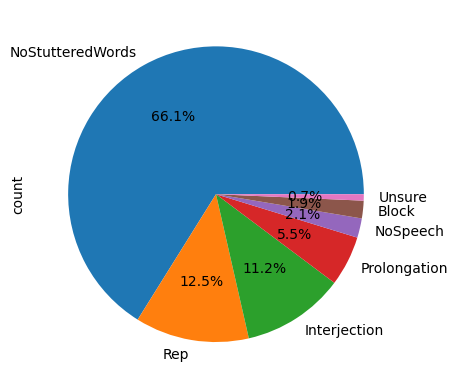

In [20]:
filtered_data['y'].value_counts()

# create pie chart of this
filtered_data['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [21]:
# remove these columns from filtered_data: Unsure	PoorAudioQuality	Prolongation	Block	DifficultToUnderstand	Interjection	NoStutteredWords	NaturalPause	Music	NoSpeech	Rep	sum_columns
filtered_data.drop(['Start', 'Stop', 'Unsure', 'PoorAudioQuality', 'Prolongation', 'Block', 'DifficultToUnderstand', 'Interjection', 'NoStutteredWords', 'NaturalPause', 'Music', 'NoSpeech', 'Rep', 'sum_columns'], axis=1, inplace=True)
filtered_data.head()

,Show,EpId,ClipId,y
1,FluencyBank,10,1,NoStutteredWords
4,FluencyBank,10,4,Rep
6,FluencyBank,10,6,NoStutteredWords
8,FluencyBank,10,8,NoStutteredWords
13,FluencyBank,10,13,NoStutteredWords


In [23]:
filtered_data.to_csv('data/filtered_clip_labels.csv', index=False)